### UMAP visualizations and heat maps of toxic/non-toxic data off-targets prediction results

In [47]:
import pandas as pd
import numpy as np
df_toxic = pd.read_csv('/home/liujin/Drugsafety/toxic_case_analysis/toxic_predict_data/toxic_offtarget_profile.csv')
df_nontoxic = pd.read_csv('/home/liujin/Drugsafety/toxic_case_analysis/toxic_predict_data/nontoxic_offtarget_profile.csv')
print("df_toxic.shape:",df_toxic.shape)
print("df_nontoxic.shape:",df_nontoxic.shape)

df_toxic.shape: (877, 243)
df_nontoxic.shape: (1229, 243)


In [48]:
def search_predict_result(smiles,predict_result_path):
# def search_predict_result(smiles,predict_result_df):
    index_list = []
    predict_result_df = pd.read_csv(predict_result_path)
    for i in range(len(predict_result_df)):
        for smile in smiles:
            if predict_result_df.at[i,'smiles'] == smile:
                index_list.append(i)
    predict_result_df = predict_result_df.iloc[index_list]
    predict = predict_result_df.values[:,1:] 
    predict_result = np.matrix(predict) 
    
    return predict_result

In [49]:
toxic_smiles = df_toxic['smiles'].tolist()
nottoxic_smiles = df_nontoxic['smiles'].tolist()
toxic_data = search_predict_result(toxic_smiles,'/home/liujin/Drugsafety/toxic_case_analysis/toxic_predict_data/toxic_offtarget_profile.csv')
not_toxic_data = search_predict_result(nottoxic_smiles,'/home/liujin/Drugsafety/toxic_case_analysis/toxic_predict_data/nontoxic_offtarget_profile.csv')
print(len(toxic_data))
print(len(not_toxic_data))

877
1229


In [50]:
print(toxic_data.shape)
print(not_toxic_data.shape)

(877, 242)
(1229, 242)


In [51]:
print(type(toxic_data))
print(type(not_toxic_data))

<class 'numpy.matrix'>
<class 'numpy.matrix'>


In [52]:
toxic_data = np.array(toxic_data).astype(float)
toxic_data_label = np.ones((toxic_data.shape[0],1)).astype(int).reshape(-1)

not_toxic_data = np.array(not_toxic_data).astype(float)
not_toxic_data_label = np.zeros((not_toxic_data.shape[0],1)).astype(int).reshape(-1)

print('toxic_data.shape:', toxic_data.shape)
print(type(toxic_data))
print('not_toxic_data.shape:', not_toxic_data.shape)
print(type(not_toxic_data))

all_data = np.concatenate([toxic_data, not_toxic_data],axis=0)
all_data.shape

toxic_data.shape: (877, 242)
<class 'numpy.ndarray'>
not_toxic_data.shape: (1229, 242)
<class 'numpy.ndarray'>


(2106, 242)

#### Toxic/non-toxic data UMAP visualization

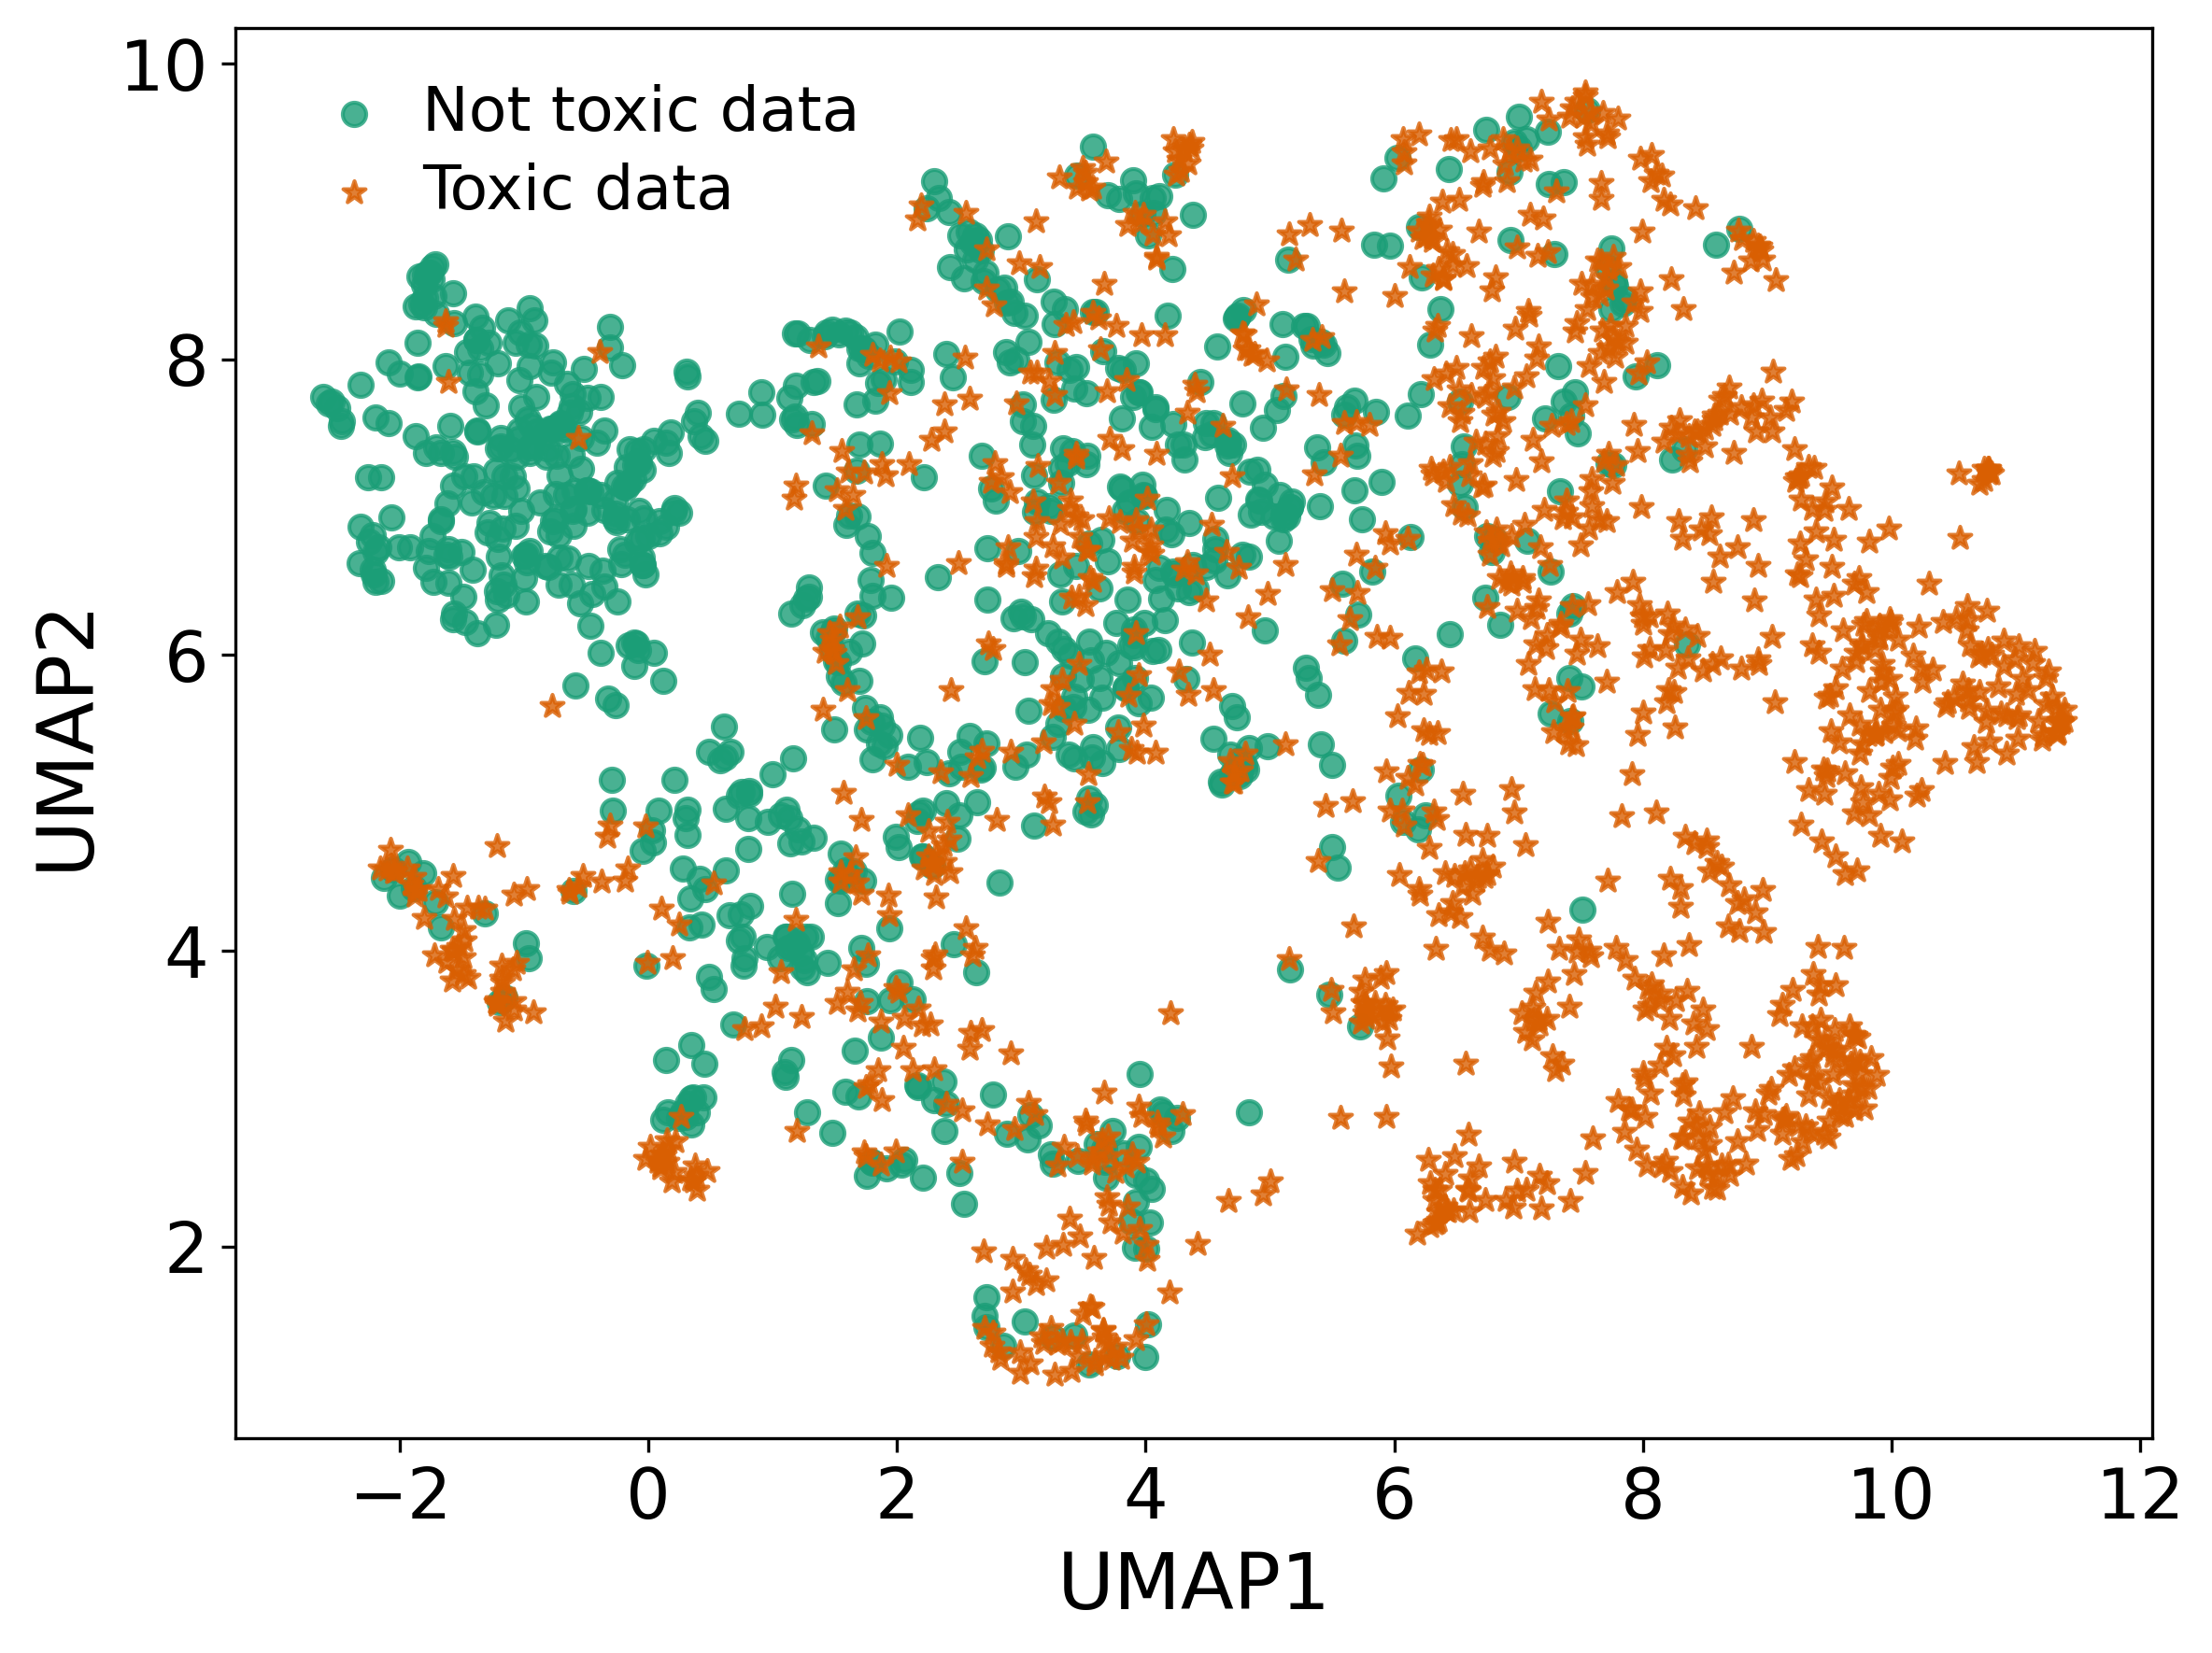

In [145]:
import umap
import matplotlib.pyplot as plt

Z1 = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.3, metric='cosine',random_state=2023)
z1 = Z1.fit_transform(all_data) 

plt.figure(figsize=(8, 6), dpi=300) 

a = plt.scatter(z1[:toxic_data.shape[0], 0], z1[:toxic_data.shape[0], 1],c='#1b9e77',alpha = 0.8,marker='o') 
b = plt.scatter(z1[toxic_data.shape[0]:, 0], z1[toxic_data.shape[0]:, 1],c='#d95f02',alpha = 0.8,marker='*') 

plt.legend((a, b), ('Not toxic data', 'Toxic data'), fontsize=16, frameon=False, labelspacing=0.3, handletextpad=0.1) #18
plt.xlabel("UMAP1",fontsize=20) 
plt.ylabel("UMAP2",fontsize=20) 
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18) 
plt.tight_layout()
plt.show()

#### Toxic/non-toxic data heat map visualization

In [9]:
toxic_data_offtarget_df = pd.DataFrame(toxic_data,index=toxic_smiles)
toxic_data_offtarget_df.reset_index(inplace=True)
toxic_data_offtarget_df.rename(columns={'index':'smiles'},inplace=True)

toxic_data_offtarget_df = toxic_data_offtarget_df.iloc[:,1:]
toxic_data_offtarget_df = toxic_data_offtarget_df.astype(float)
print(toxic_data_offtarget_df.shape)
toxic_data_offtarget_df.head(3)

(877, 242)


0         1         2         3         4         5         6    \
0  0.219586  0.003386  0.014749  0.000278  0.244221  0.000329  0.122799   
1  0.024630  0.021901  0.002378  0.017851  0.068139  0.002658  0.070676   
2  0.036044  0.005839  0.017167  0.000458  0.613274  0.016169  0.919141   

        7         8         9    ...       232       233           234  \
0  0.018120  0.012746  0.137936  ...  0.000002  0.002075  1.603341e-07   
1  0.043953  0.240859  0.124129  ...  0.000454  0.032242  5.654480e-04   
2  0.046445  0.000831  0.136743  ...  0.000009  0.004523  6.535329e-05   

        235       236       237       238       239       240       241  
0  0.000497  0.138698  0.000036  0.000171  0.000014  0.037714  0.000171  
1  0.000504  0.013504  0.001067  0.000694  0.000368  0.018621  0.000496  
2  0.005208  0.014078  0.000044  0.007341  0.001489  0.002780  0.054914  

[3 rows x 242 columns]

In [10]:
nottoxic_data_offtarget_df = pd.DataFrame(not_toxic_data,index=nottoxic_smiles)
nottoxic_data_offtarget_df.reset_index(inplace=True)
nottoxic_data_offtarget_df.rename(columns={'index':'smiles'},inplace=True)

nottoxic_data_offtarget_df = nottoxic_data_offtarget_df.iloc[:,1:]
nottoxic_data_offtarget_df = nottoxic_data_offtarget_df.astype(float)
print(nottoxic_data_offtarget_df.shape)
nottoxic_data_offtarget_df.head(3)

(1229, 242)


0             1             2             3             4    \
0  2.849065e-02  1.081211e-04  1.600648e-03  5.487176e-04  7.716985e-02   
1  2.127523e-08  8.587138e-08  1.485980e-05  3.572340e-06  6.714524e-02   
2  7.661954e-13  5.568727e-10  4.540161e-11  3.956575e-07  1.736249e-07   

            5             6             7             8             9    ...  \
0  2.211515e-02  1.789257e-02  1.871701e-02  3.687020e-02  2.311962e-01  ...   
1  5.819127e-10  1.486883e-02  6.831833e-05  9.140034e-02  4.279406e-04  ...   
2  5.287213e-12  5.085449e-09  1.974301e-10  4.803986e-08  4.184488e-10  ...   

            232           233           234       235       236           237  \
0  6.887390e-04  5.263167e-03  8.683416e-05  0.001027  0.005465  1.834295e-01   
1  5.124131e-07  2.422322e-05  2.898091e-05  0.052738  0.000431  2.088756e-03   
2  4.248377e-08  4.146053e-07  1.286319e-09  0.000002  0.000006  3.903596e-08   

            238           239       240           241  
0  9.822531e-03  1.028973e-01  0.003322  8.101762e-02  
1  4.109972e-03  2.600984e-02  0.000213  1.949839e-01  
2  1.372845e-07  1.002970e-07  0.000002  9.069210e-08  

[3 rows x 242 columns]

In [11]:
offtarget_df = pd.concat([toxic_data_offtarget_df,nottoxic_data_offtarget_df],axis=0)
print(offtarget_df.shape)

(2106, 242)


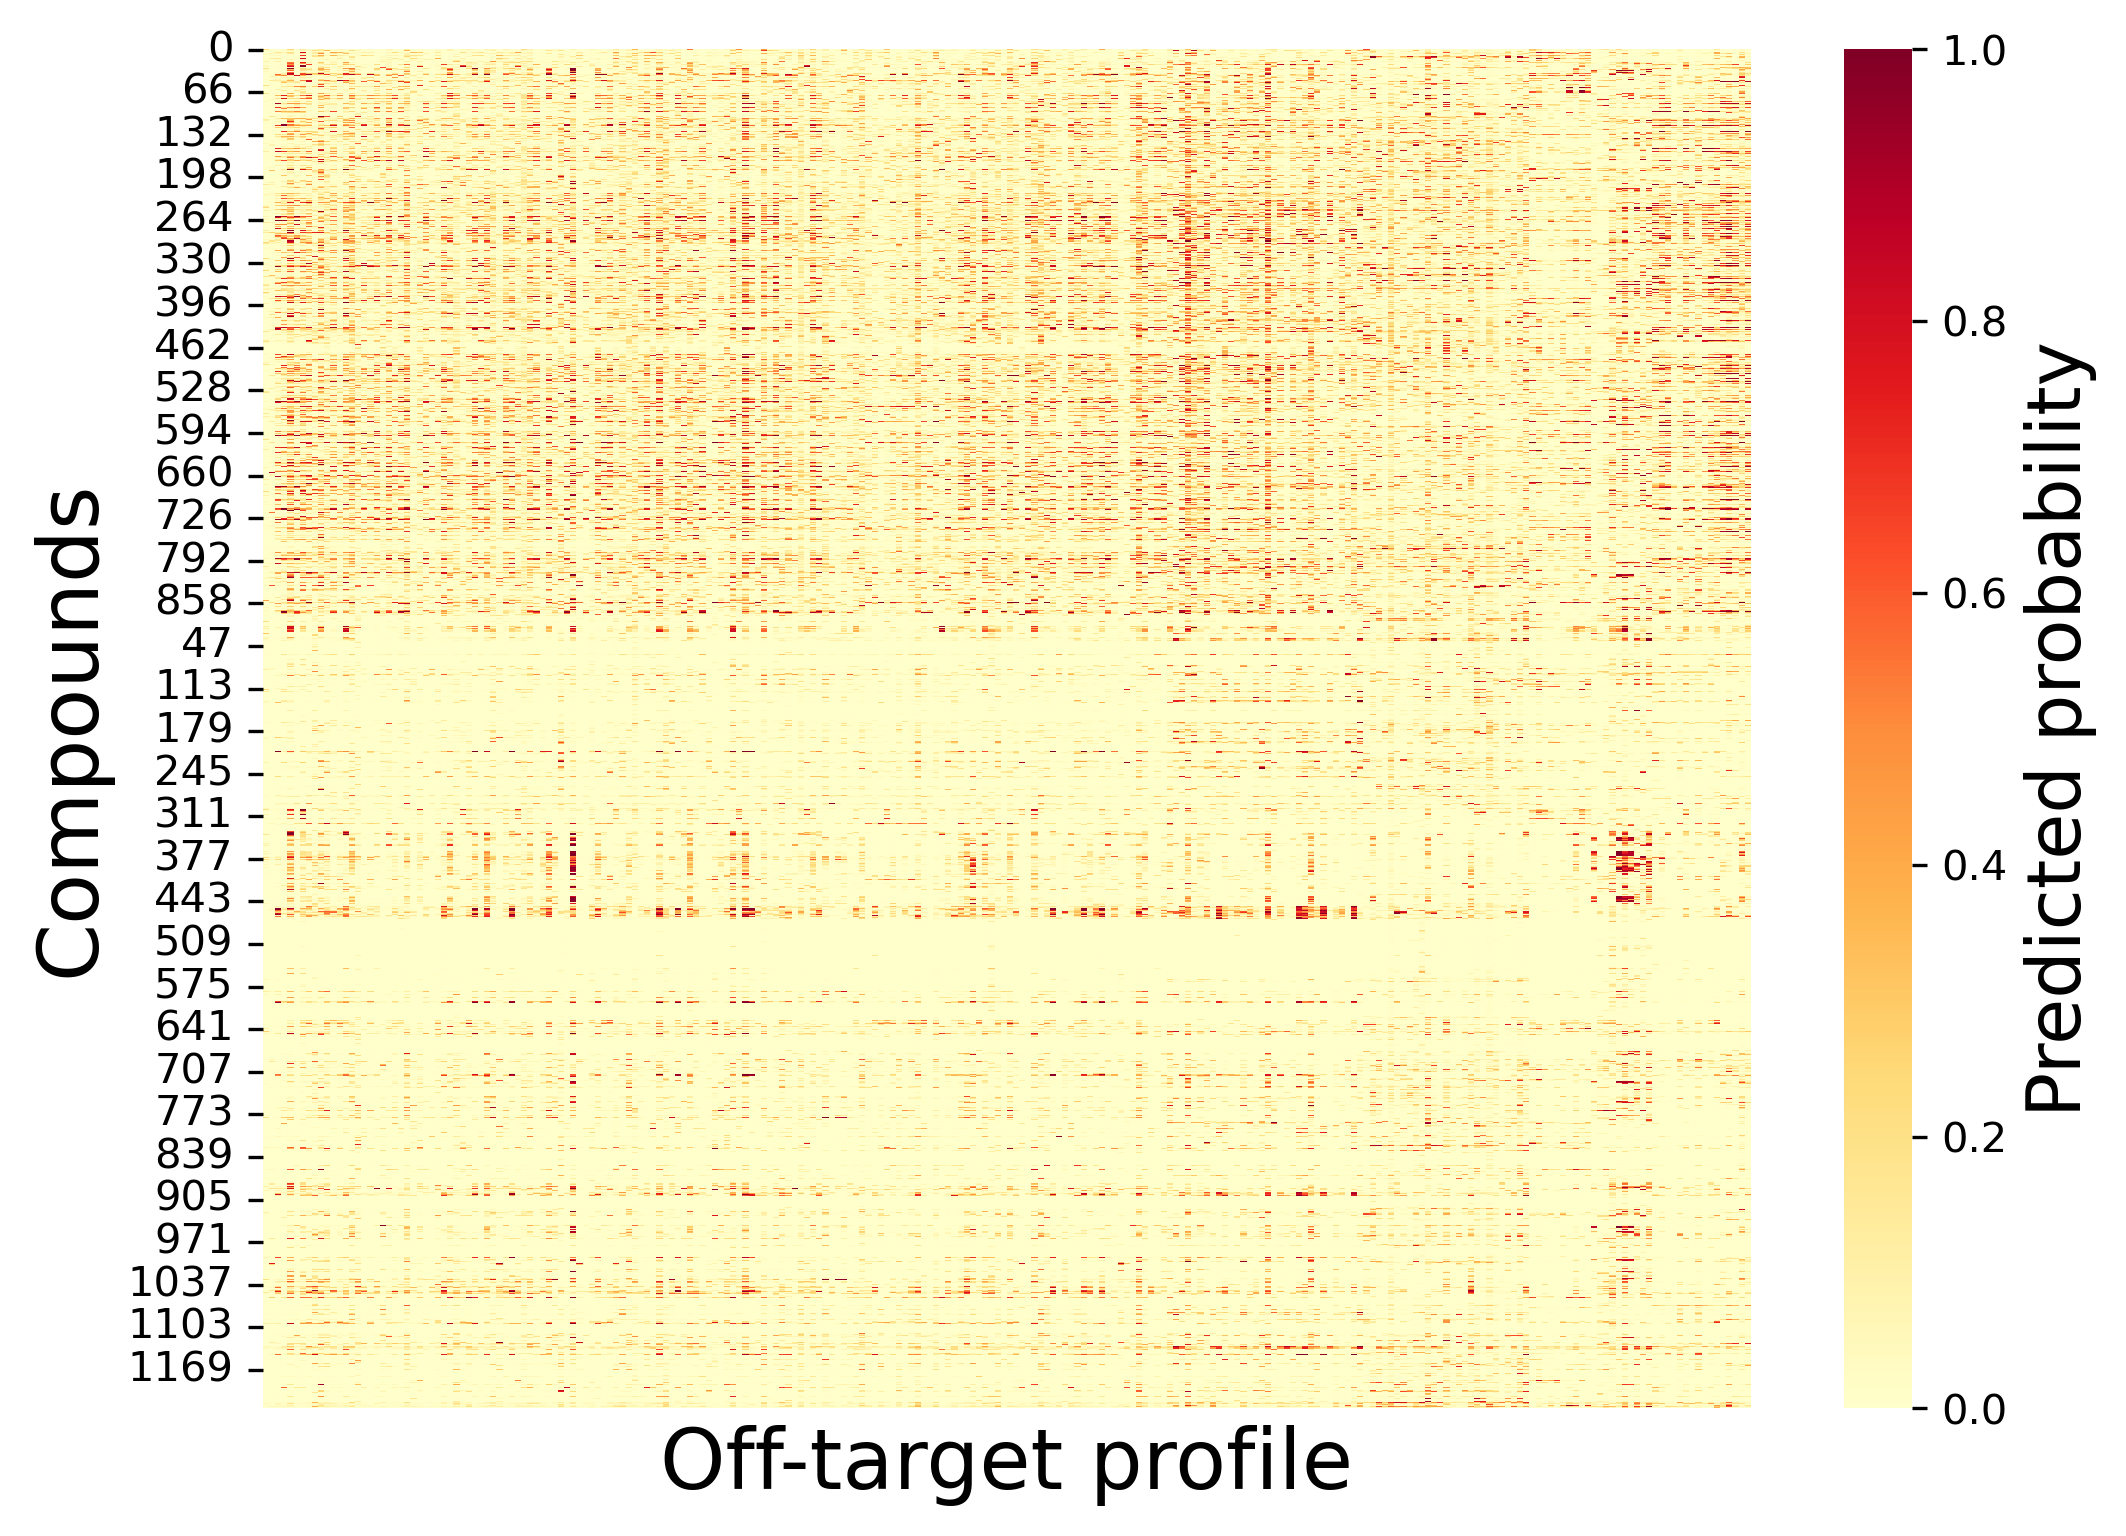

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6),dpi=300)


heatmap = sns.heatmap(data=offtarget_df,
            cmap=plt.get_cmap('YlOrRd'),
            xticklabels=False,
           )

plt.xlabel('Off-target profile',fontsize=20)
plt.ylabel('Compounds',fontsize=20)


heatmap.collections[0].colorbar.set_label("Predicted probability",fontsize=18)

### UMAP visualizations and heat maps of toxic/non-toxic data ECFP fingerprint

In [80]:
#导入数据
import pandas as pd
import numpy as np
df_toxic = pd.read_csv('/home/liujin/Drugsafety/toxic_case_analysis/toxic_predict_data/toxic_offtarget_profile.csv')
df_nontoxic = pd.read_csv('/home/liujin/Drugsafety/toxic_case_analysis/toxic_predict_data/nontoxic_offtarget_profile.csv')
print("df_toxic.shape:",df_toxic.shape)
print("df_nontoxic.shape:",df_nontoxic.shape)

df_toxic.shape: (877, 243)
df_nontoxic.shape: (1229, 243)


In [81]:
from rdkit import Chem
from rdkit.Chem import AllChem

def smiles_to_fingerprint(smiles):
    mols = list(map(lambda x: Chem.MolFromSmiles(x), smiles))
    fingerprint = np.array(list(map(lambda x: AllChem.GetMorganFingerprintAsBitVect(x,2,1024), mols))) 
    
    return fingerprint

In [82]:
toxic_smiles = df_toxic['smiles'].tolist()
nottoxic_smiles = df_nontoxic['smiles'].tolist()

toxic_data_ecfp = smiles_to_fingerprint(toxic_smiles)
not_toxic_data_ecfp = smiles_to_fingerprint(nottoxic_smiles)
print(len(toxic_data_ecfp))
print(len(not_toxic_data_ecfp))

877
1229


In [83]:
toxic_data_ecfp = np.array(toxic_data_ecfp).astype(float)
toxic_data_ecfp_label = np.ones((toxic_data_ecfp.shape[0],1)).astype(int).reshape(-1)

not_toxic_data_ecfp = np.array(not_toxic_data_ecfp).astype(float)
not_toxic_data_ecfp_label = np.zeros((not_toxic_data_ecfp.shape[0],1)).astype(int).reshape(-1)

print('toxic_data.shape:', toxic_data_ecfp.shape)
print(type(toxic_data_ecfp))
print('not_toxic_data.shape:', not_toxic_data_ecfp.shape)
print(type(not_toxic_data_ecfp))

all_data_ecfp = np.concatenate([toxic_data_ecfp, not_toxic_data_ecfp],axis=0)
all_data_ecfp.shape

toxic_data.shape: (877, 1024)
<class 'numpy.ndarray'>
not_toxic_data.shape: (1229, 1024)
<class 'numpy.ndarray'>


(2106, 1024)

#### Toxic/not-toxic data UMAP visualization

In [146]:
import umap
import matplotlib.pyplot as plt
Z1 = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.3, metric='cosine',random_state=2023)
z1 = Z1.fit_transform(all_data_ecfp)

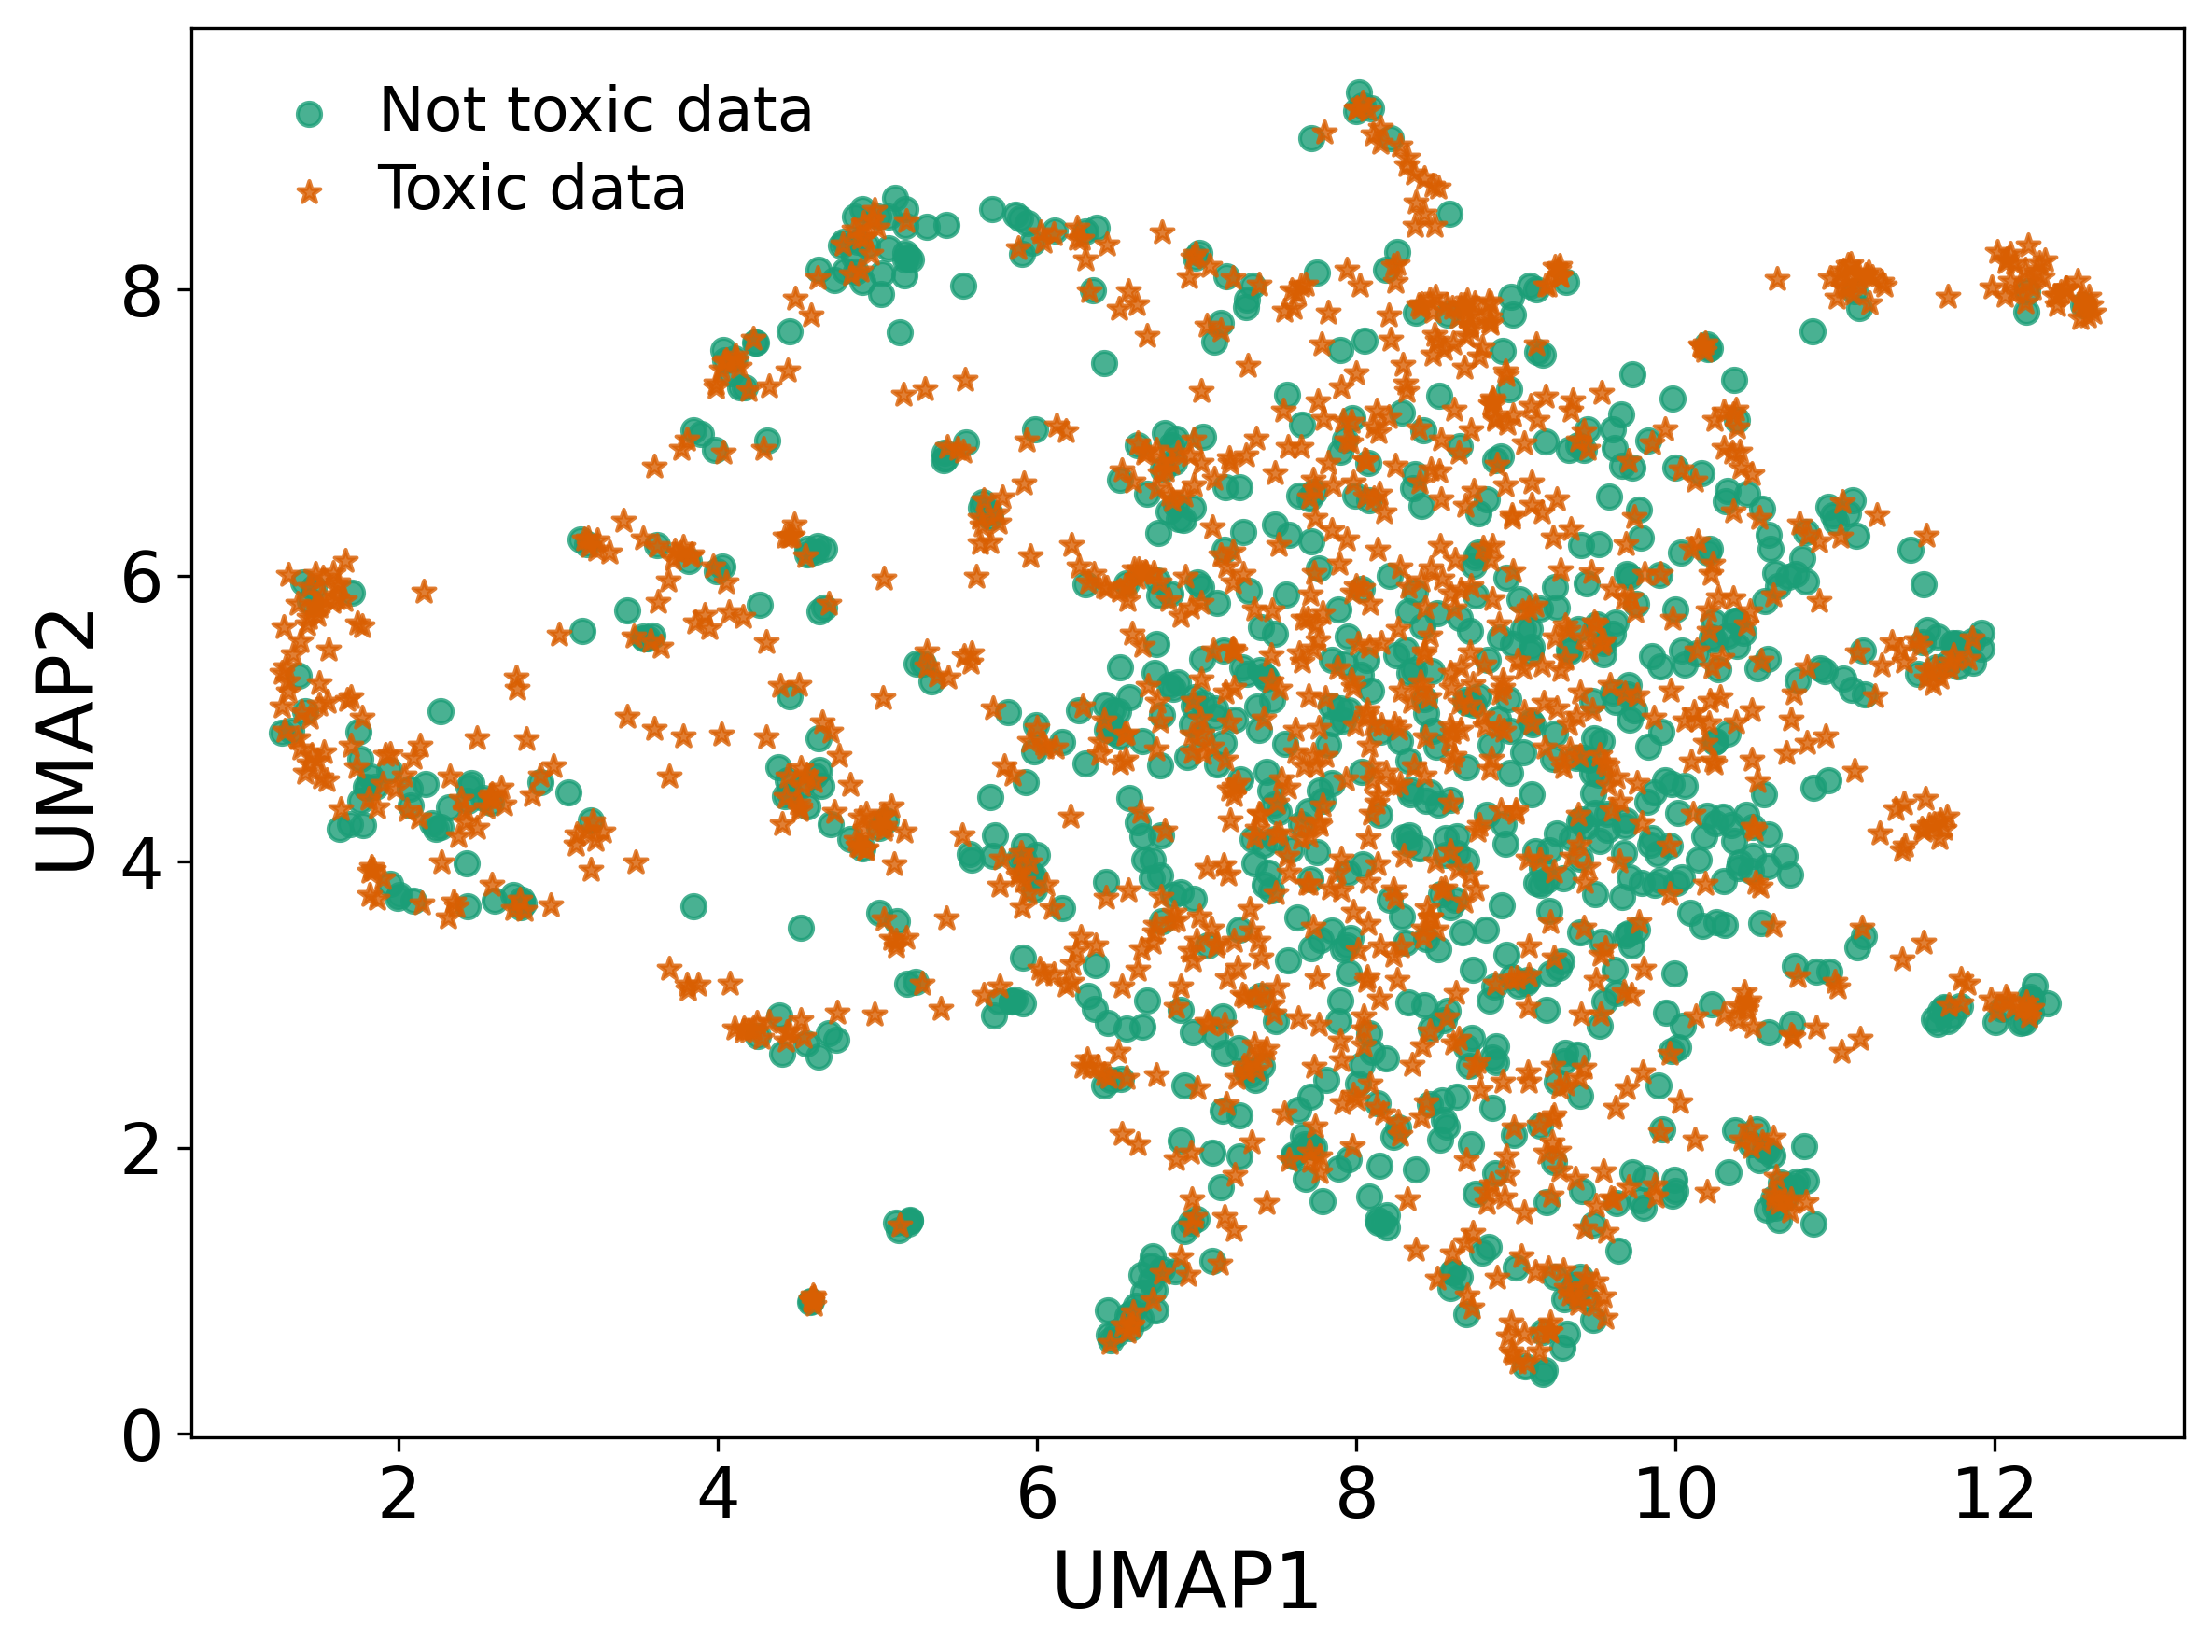

In [147]:

plt.figure(figsize=(8, 6), dpi=300) 
a = plt.scatter(z1[:toxic_data_ecfp.shape[0], 0], z1[:toxic_data_ecfp.shape[0], 1],c='#1b9e77',alpha = 0.8,marker='o') 
b = plt.scatter(z1[toxic_data_ecfp.shape[0]:, 0], z1[toxic_data_ecfp.shape[0]:, 1],c='#d95f02',alpha = 0.8,marker='*') 
plt.legend((a, b), ('Not toxic data', 'Toxic data'), fontsize=16, frameon=False, labelspacing=0.3, handletextpad=0.1) 

plt.xlabel("UMAP1",fontsize=20) 
plt.ylabel("UMAP2",fontsize=20) 
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18) 
plt.tight_layout()
plt.show()

#### Toxic/not-toxic data heat map visualization

In [19]:
toxic_data_ecfp_df = pd.DataFrame(toxic_data_ecfp,index=toxic_smiles)
# toxic_data_sorted_df.rename(columns=columns_dict,inplace=True)
toxic_data_ecfp_df.reset_index(inplace=True)
toxic_data_ecfp_df.rename(columns={'index':'smiles'},inplace=True)

toxic_data_ecfp_df = toxic_data_ecfp_df.iloc[:,1:]
toxic_data_ecfp_df = toxic_data_ecfp_df.astype(float)
print(toxic_data_ecfp_df.shape)
toxic_data_ecfp_df.head(3)

(877, 1024)


0     1     2     3     4     5     6     7     8     9     ...  1014  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1015  1016  1017  1018  1019  1020  1021  1022  1023  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  

[3 rows x 1024 columns]

In [20]:
nottoxic_data_ecfp_df = pd.DataFrame(not_toxic_data_ecfp,index=nottoxic_smiles)
# nottoxic_data_maccskeys_df.rename(columns=columns_dict,inplace=True)
nottoxic_data_ecfp_df.reset_index(inplace=True)
nottoxic_data_ecfp_df.rename(columns={'index':'smiles'},inplace=True)

nottoxic_data_ecfp_df = nottoxic_data_ecfp_df.iloc[:,1:]
nottoxic_data_ecfp_df = nottoxic_data_ecfp_df.astype(float)
print(nottoxic_data_ecfp_df.shape)
nottoxic_data_ecfp_df.head(3)

(1229, 1024)


0     1     2     3     4     5     6     7     8     9     ...  1014  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1015  1016  1017  1018  1019  1020  1021  1022  1023  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[3 rows x 1024 columns]

In [21]:
data_ecfp_df = pd.concat([toxic_data_ecfp_df,nottoxic_data_ecfp_df],axis=0)
print(data_ecfp_df.shape)

(2106, 1024)


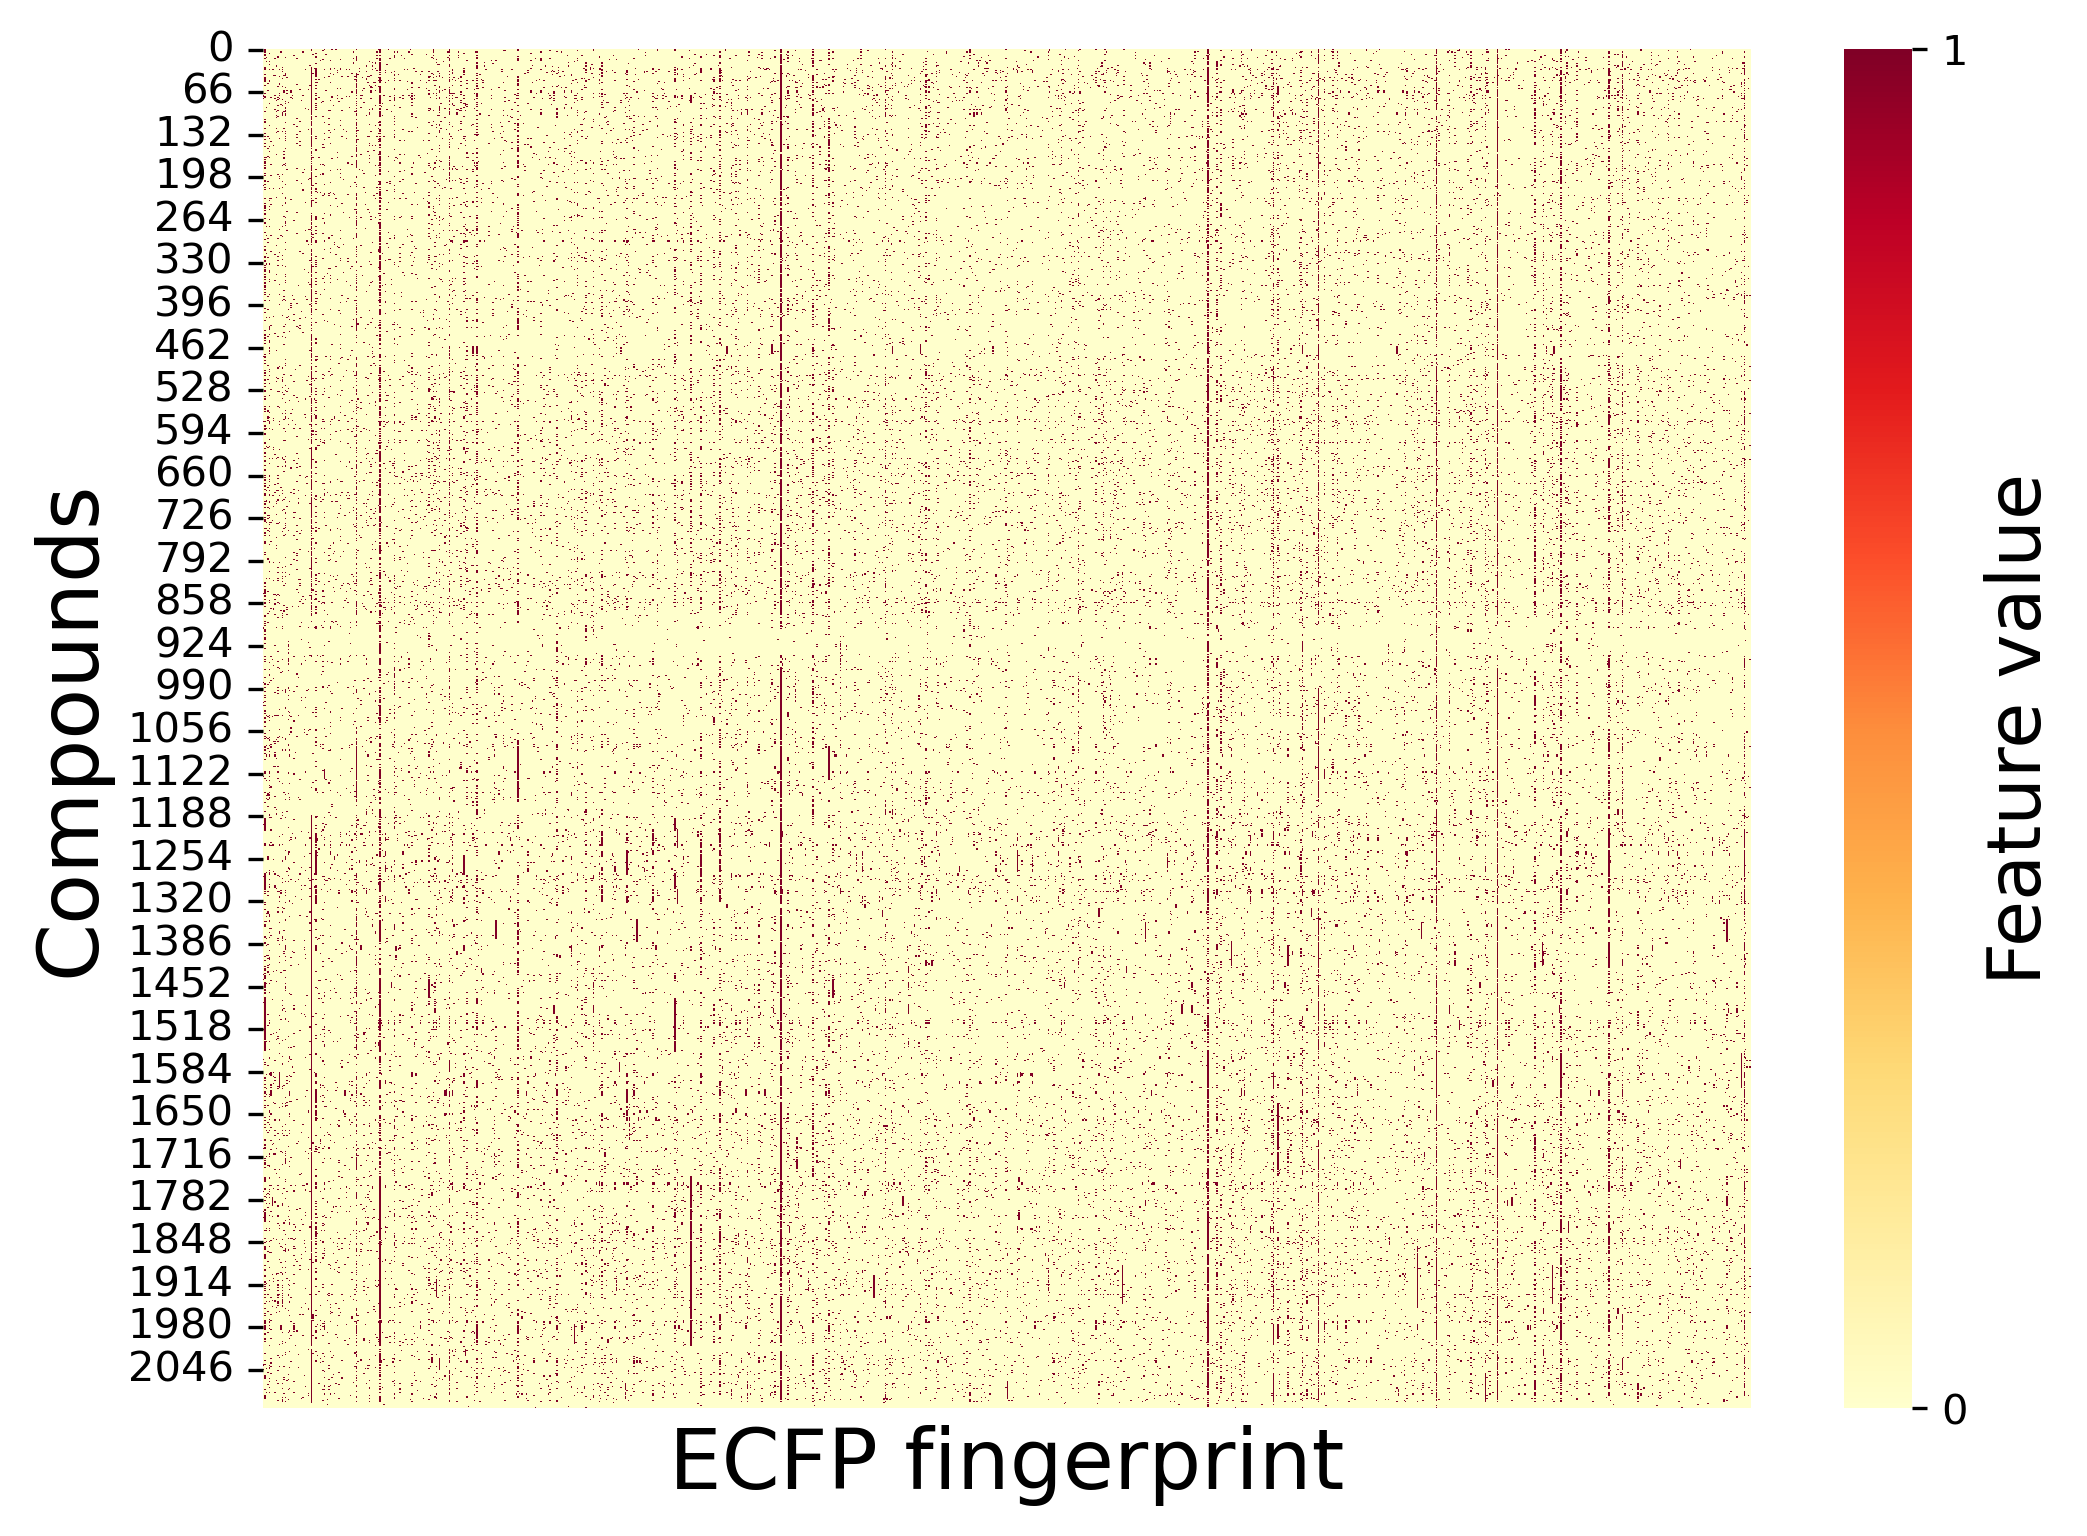

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6),dpi=300)

heatmap = sns.heatmap(data=np.where(data_ecfp_df>0.3,1,0),
            cmap=plt.get_cmap('YlOrRd'),
            cbar=True
           )

plt.xlabel('ECFP fingerprint',fontsize=20)
plt.ylabel('Compounds',fontsize=20)

heatmap.collections[0].colorbar.set_label("Feature value",fontsize=18)
heatmap.collections[0].colorbar.set_ticks([0, 1]) 
heatmap.collections[0].colorbar.set_ticklabels(['0', '1']) 